In [1]:
%matplotlib inline

import numpy as np
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
# data, target_names, target, feature_names
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# Feature matrix in a object named X
X = iris.data
# response vector in a object named y
y = iris.target

print(np.shape(X))
print(np.shape(y))

(150, 4)
(150,)


In [4]:
# Split iris data in train and test data (80:20)

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

**Feature Scaling**

Before making actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated. Feature scaling is performed only on the training data and not on test data. This is because in real world, data is not scaled and the ultimate purpose of the neural network is to make predictions on real world data. Therefore, we try to keep our test data as real as possible.

In [5]:
# scale the training data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# now build the neural network using MLPClassifier
# MLPClassifier stands for Multi-layer Perceptron classifier

# https://analyticsindiamag.com/a-beginners-guide-to-scikit-learns-mlpclassifier/

from sklearn.neural_network import MLPClassifier

# the following code will create a classifier with three layers of 10 nodes each
# max_iter refers to the number of epochs, one epoch is a combination of one cycle of 
# feed-forward and back propagation phase.
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

# now fit the classifer to the training data
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

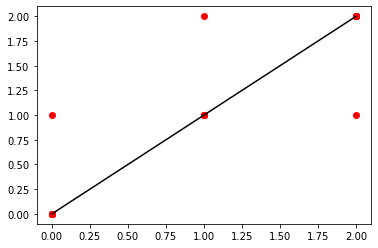

In [7]:
# try makign some predictions using your classifier
predictions = mlp.predict(X_test)

plt.plot(y_test, predictions, 'ro')
plt.plot([0, 2], [0, 2],'k')

In [8]:
# and now test your predictions

from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

# We will use the confusion matrix to determine the accuracy which is measured as the total 
# number of correct predictions divided by the total number of predictions.

[[15  1  0]
 [ 0  4  1]
 [ 0  1  8]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.67      0.80      0.73         5
           2       0.89      0.89      0.89         9

    accuracy                           0.90        30
   macro avg       0.85      0.88      0.86        30
weighted avg       0.91      0.90      0.90        30



In [9]:
# now build a loop to test how well different number of hidden layers performs

scores = {}
scores_list = []
l_range = range(4, 20, 1)

from sklearn import metrics

for l in l_range:
    print(l)
    mlp = MLPClassifier(hidden_layer_sizes=(l, l, l), max_iter=1000)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)
    scores[l] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    


4


/Users/sclayton/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5
6


/Users/sclayton/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0, 0.5, 'accuracy score')

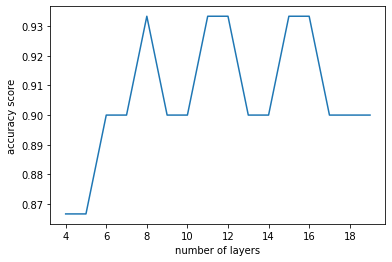

In [10]:
# plot the model accuracy for each value of k

plt.plot(l_range,scores_list)
plt.xlabel('number of layers')
plt.ylabel('accuracy score')

In [11]:
# let's go with a 7 layer model
mlp = MLPClassifier(hidden_layer_sizes=(7,7,7), max_iter=1000)
mlp.fit(X_train, y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(7, 7, 7), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
# here we apply the new model built above to 'new' data

#0 = setosa, 1=versicolor, 2=virginica
classes = {0:'setosa',1:'versicolor',2:'virginica'}

# Make a prediction for the 'new' data 
# predict for the below two random observations
x_new = [[3,4,5,2],[5,4,2,2]]
x_new_scaled = scaler.transform(x_new)

y_predict = mlp.predict(x_new_scaled)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginica
versicolor


Text(0.5, 0, 'sepal width (cm)')

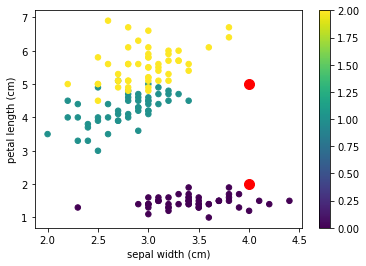

In [13]:
plt.scatter(iris.data[:,1], iris.data[:,2], s = 30, c = iris.target)
plt.colorbar()
plt.plot(np.array(x_new)[:,1], np.array(x_new)[:,2], 'or', markersize = 10)

plt.ylabel(iris.feature_names[2])
plt.xlabel(iris.feature_names[1])